In [23]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re

In [24]:
url="https://www.mohfw.gov.in/"
response=requests.get(url)

In [25]:
response

<Response [200]>

In [26]:
soup = BeautifulSoup(response.text, "html.parser")

In [32]:
tab=soup.find_all('tr')

In [35]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    text=str(text)
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [70]:
sl=list()
state=list()
indian=list()
foreign=list()
discharged=list()
death=list()

In [71]:
tab[0].find_all('th')

[<th align="'centre" width="47"><strong>S. No.</strong></th>,
 <th align="'centre" width="83"><strong>Name of State / UT</strong></th>,
 <th align="'centre" width="91"><strong>Total Confirmed cases (Indian National)</strong></th>,
 <th align="'centre" width="90"><strong>Total Confirmed cases ( Foreign National )</strong></th>,
 <th align="'centre" width="83"><strong>Cured/<br/>Discharged/Migrated</strong></th>,
 <th align="'centre" width="83"><strong>Death</strong></th>]

In [72]:
for row in tab[1:-1]:
    lst=row.find_all('td')
    state.append(remove_html_tags(lst[1]))
    indian.append(int(remove_html_tags(lst[2])))
    foreign.append(int(remove_html_tags(lst[3])))
    discharged.append(int(remove_html_tags(lst[4])))
    death.append(int(remove_html_tags(lst[5])))

In [73]:
import pandas as pd

In [74]:
data=pd.DataFrame(list(zip(state,indian,foreign,discharged,death)),columns=['State','Indian','Foregin','Discharged','Death'])

In [75]:
data

,State,Indian,Foregin,Discharged,Death
0,Andhra Pradesh,3,0,0,0
1,Chhattisgarh,1,0,0,0
2,Delhi,25,1,5,1
3,Gujarat,7,0,0,0
4,Haryana,3,14,0,0
5,Himachal Pradesh,2,0,0,0
6,Karnataka,15,0,1,1
7,Kerala,33,7,3,0
8,Madhya Pradesh,4,0,0,0
9,Maharashtra,60,3,0,1


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

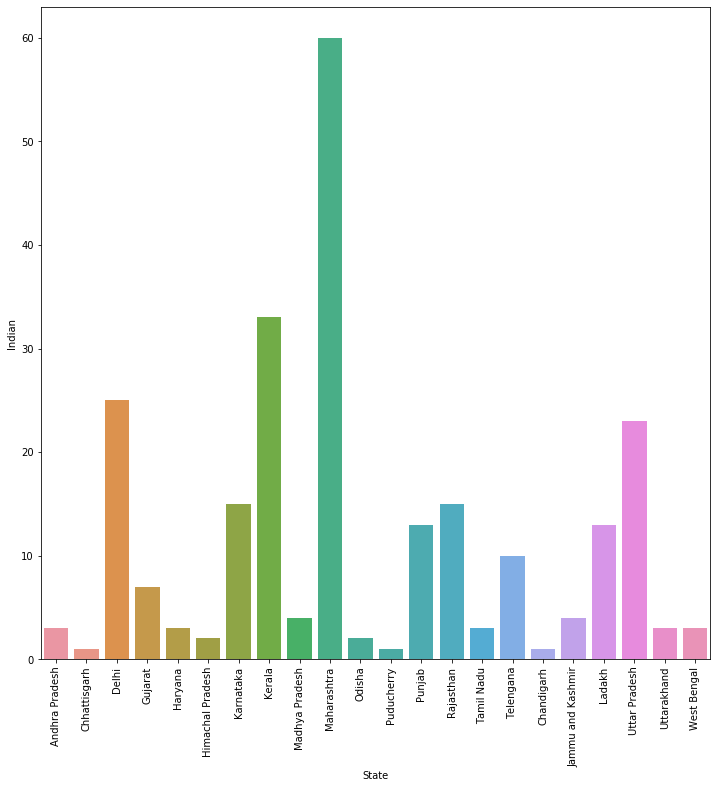

In [92]:
plt.figure(figsize=(12,12))
chart=sns.barplot(x=data['State'],y=data['Indian'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()